In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [2]:
from google.colab import files
uploaded = files.upload()


Saving weatherAUS.csv to weatherAUS.csv


In [5]:
# Assuming the uploaded file is a CSV, get the filename
weather= list(uploaded.keys())[0]

# Read it into a DataFrame
df = pd.read_csv(weather)

# Preview the data
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.shape

(145460, 23)

In [5]:
110316+31877

142193

In [6]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [6]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [8]:
# Missing Values

In [7]:
from sklearn.impute import SimpleImputer
for col in df.columns:
    if df[col].dtype == 'object':  # Categorical
        imputer = SimpleImputer(strategy='most_frequent')
    else:  # Numeric
        imputer = SimpleImputer(strategy='mean')

    df[[col]] = imputer.fit_transform(df[[col]])

df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [10]:
# Label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,397,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,398,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,399,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,400,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


In [10]:

X = df.drop(["RainTomorrow"], axis=1)
y = df["RainTomorrow"]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
# Step 3: Build ANN Model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Step 4: Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Train Model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


# Step 6: Evaluate & Predict
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7534 - loss: 1.5043 - val_accuracy: 0.5635 - val_loss: 1.2927
Epoch 2/20
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7787 - loss: 0.8071 - val_accuracy: 0.7767 - val_loss: 0.5545
Epoch 3/20
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7980 - loss: 0.5823 - val_accuracy: 0.8341 - val_loss: 0.3920
Epoch 4/20
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8102 - loss: 0.4886 - val_accuracy: 0.8028 - val_loss: 0.4344
Epoch 5/20
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8145 - loss: 0.4530 - val_accuracy: 0.8287 - val_loss: 0.3945
Epoch 6/20
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8209 - loss: 0.4194 - val_accuracy: 0.8396 - val_loss: 0.3789
Epoch 7/20
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8286 - loss: 0.3987 - val_accuracy: 0.8390 - val_loss: 0.3781
Epoch 8/20
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8299 - loss: 0.393

In [ ]:
y.value_counts()

In [12]:

y_pred=model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Final Accuracy: {accuracy:.4f}")

910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
✅ Final Accuracy: 0.8385


<Axes: >

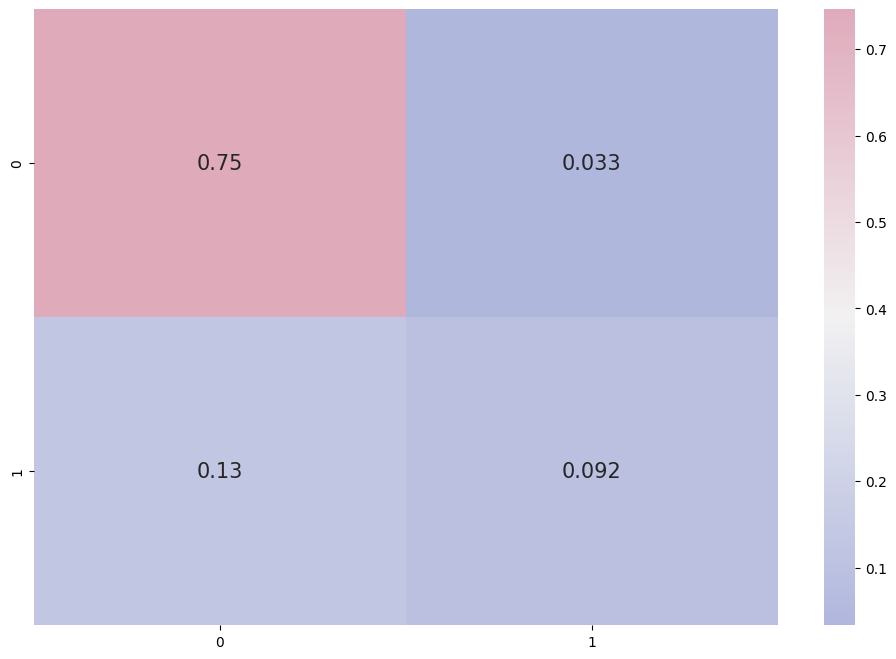

In [13]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

**EDA**

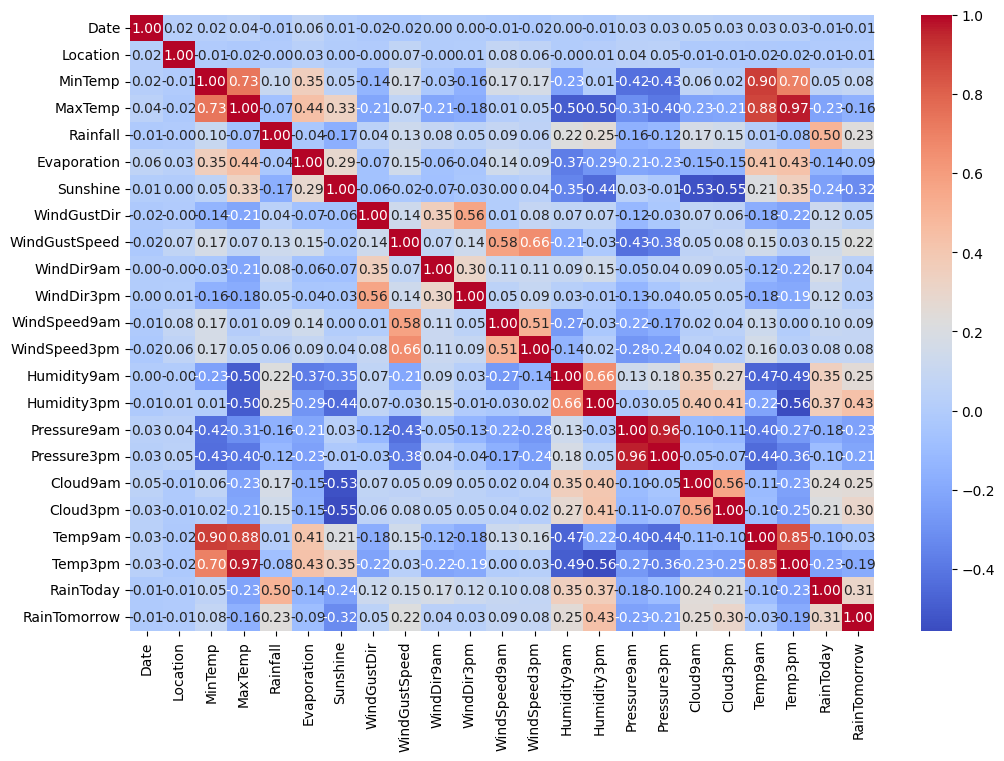

In [14]:
# Correlation matrix for numeric columns
correlation_matrix = df.corr()

# Plot heatmap of correlations
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [ ]:
df['Location'].value_counts()

In [15]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [17]:

X = df[['Location','MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday',]]
y = df["RainTomorrow"]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Step 3: Build ANN Model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Step 4: Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(X_train, y_train, epochs=50, batch_size=32,
          validation_split=0.2, callbacks=[early_stop])

# Step 6: Evaluate & Predict
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7777 - loss: 2.3840 - val_accuracy: 0.5731 - val_loss: 0.8920
Epoch 2/50
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8071 - loss: 0.4856 - val_accuracy: 0.7867 - val_loss: 0.7951
Epoch 3/50
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8114 - loss: 0.4644 - val_accuracy: 0.8407 - val_loss: 0.3793
Epoch 4/50
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8241 - loss: 0.4172 - val_accuracy: 0.8165 - val_loss: 0.4614
Epoch 5/50
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8259 - loss: 0.4062 - val_accuracy: 0.8369 - val_loss: 0.3852
Epoch 6/50
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8298 - loss: 0.3927 - val_accuracy: 0.8380 - val_loss: 0.3877
Epoch 7/50
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8341 - loss: 0.3893 - val_accuracy: 0.8416 - val_loss: 0.3724
Epoch 8/50
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8329 - loss: 0.3867 

In [21]:
%%time
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

#remove warnings
import warnings
warnings.filterwarnings('ignore')

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Preprocessing
# Dropping rows with missing 'age' and 'embarked' values
titanic.dropna(subset=['age', 'embarked'], inplace=True)

# Converting categorical variables to dummy variables
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked', 'class', 'who', 'deck'], drop_first=True)

# Selecting features and target
X = titanic.drop(['survived', 'alive', 'embark_town', 'adult_male', 'alone'], axis=1)
y = titanic['survived']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the model
input_layer = tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)) # input layer
# hidden_layer = tf.keras.layers.Dense(10, activation='relu') # hidden layer
output_layer = tf.keras.layers.Dense(1, activation='sigmoid') # output layer

model = tf.keras.models.Sequential([input_layer,
                                    # hidden_layer,
                                    output_layer])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history=model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6039 - loss: 0.7754
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6078 - loss: 0.7396
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7331 - loss: 0.6433
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7252 - loss: 0.6010  
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7534 - loss: 0.5627 
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7758 - loss: 0.5163 
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7506 - loss: 0.5221 
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7535 - loss: 0.4964 
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7596 - loss: 0.4992 
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7707 - loss: 0.4726 
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7663 - loss: 0.4472 
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6161 - loss: 1.1193 - val_accuracy: 0.5789 - val_loss: 1.1077
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6239 - loss: 0.9679 - val_accuracy: 0.5789 - val_loss: 1.0128
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6093 - loss: 0.8817 - val_accuracy: 0.5877 - val_loss: 0.9258
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6231 - loss: 0.7893 - val_accuracy: 0.5877 - val_loss: 0.8546
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6343 - loss: 0.7331 - val_accuracy: 0.6053 - val_loss: 0.7901
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6500 - loss: 0.6996 - val_accuracy: 0.6228 - val_loss: 0.7369
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6758 - loss: 0.6196 - val_accuracy: 0.6404 - val_loss: 0.6994
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7096 - loss: 0.6273 - val_accuracy: 0.

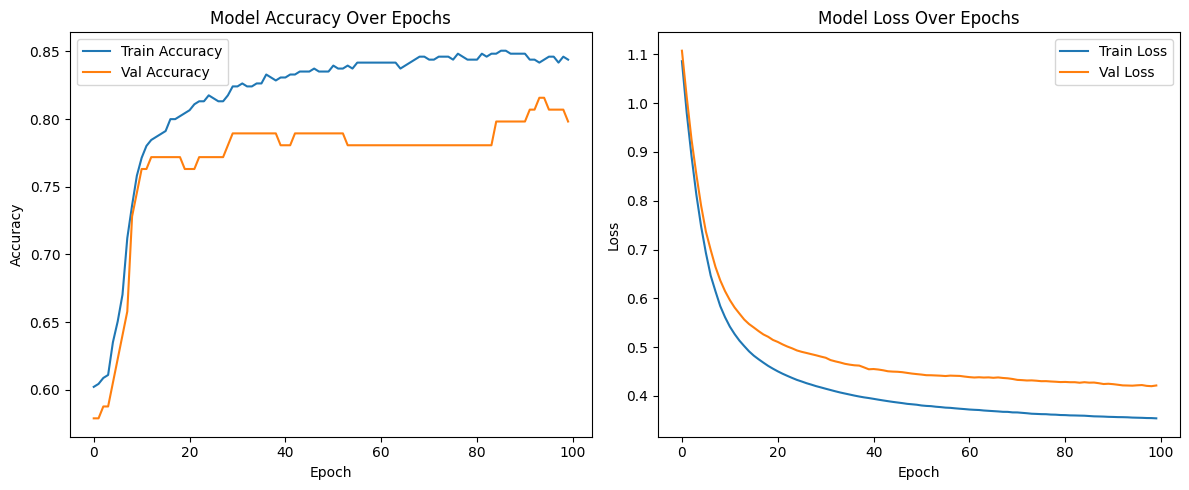

CPU times: user 16.9 s, sys: 637 ms, total: 17.5 s
Wall time: 24.1 s


In [23]:
%%time
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Preprocessing
titanic.dropna(subset=['age', 'embarked'], inplace=True)
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked', 'class', 'who', 'deck'], drop_first=True)

X = titanic.drop(['survived', 'alive', 'embark_town', 'adult_male', 'alone'], axis=1)
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
input_layer = tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],))
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')

model = tf.keras.models.Sequential([input_layer, output_layer])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model (with validation split)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
